problem  a  :     \
plot iteration VS misclassifier in line [290]\
the value of lambda:\
[0.19, 0.133, 0.0875, 0.053, 0.0385]\
the number of features:\
[10, 30, 101, 299, 503]\
the train misclassifier:\
[0.1213333333333333,
 0.07133333333333336,
 0.03183333333333338,
 0.012499999999999956,
 0.007833333333333359]\
the test misclassifier :\
[0.122,
 0.07899999999999996,
 0.03300000000000003,
 0.017000000000000015,
 0.013000000000000012]

problem  b  :     \
plot iteration VS misclassifier in line [299]\
the value of lambda:\
[0.14, 0.098, 0.07, 0.0523, 0.0465]\
the number of features:\
[11, 30, 103, 299, 507]\
the train misclassifier:\
[0.12, 0.050000000000000044, 0.01666666666666672, 0.0, 0.0]\
the test misclassifier :\
[0.17333333333333334,
 0.1166666666666667,
 0.08999999999999997,
 0.06333333333333335,
 0.07999999999999996]

problem c :\
plot iteration VS misclassifier in line [310]\
the value of lambda:\
[0.0298, 0.025, 0.017, 0.0074, 0.0001]\
the number of features:\
[8, 28, 101, 299, 497]\
the train misclassifier:\
[0.386, 0.37050000000000005, 0.3255, 0.27049999999999996, 0.25849999999999995]\
the test misclassifier :\
[0.4016666666666666,
 0.4116666666666666,
 0.43833333333333335,
 0.43333333333333335,
 0.42333333333333334]

In [278]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

In [279]:
def predict(y,y_label,w):
    size = y_label.shape[0]
    p = 1/(1+np.exp(y@w))
    y_pred = np.zeros((size,1))
    y_pred[p<0.5] = 1
    err = 1-accuracy_score(y_label,y_pred)
    return err

In [280]:
# define the normalize 
def scaler(x):
    scaler = StandardScaler()
    scaler = scaler.fit(x)
    y = scaler.fit(x).transform(x)
    return y

In [281]:
def TISP(x,y,lamda,itera):
    w = np.zeros(x.shape[1])
    eta=1/x.shape[0]
    for j in range(itera):
        sig=1/(1+np.exp(-x@w))
        y_ = y - sig
        w=w+eta*x.T@y_
        for i in range(w.shape[0]):
            if abs(w[i])<=lamda:
                w[i]=0
    return w

In [282]:
def TISP_300(x,y,lamda,itera):
    w = np.zeros(x.shape[1])
    eta=1/x.shape[0]
    err = []
    for j in range(itera):
        sig=1/(1+np.exp(-x@w))
        y_ = y - sig
        w=w+eta*x.T@y_
        for i in range(w.shape[0]):
            if abs(w[i])<=lamda:
                w[i]=0
        err_ = predict(x,y,w)
        err.append(err_)
    return err

In [284]:
####  problem a   ####
# import data 
X_train = np.loadtxt(r"D:\2020fall\5635 machine learning\5635 hw\hw4\Gisette\gisette_train.data")
train_label = np.loadtxt(R"D:\2020fall\5635 machine learning\5635 hw\hw4\Gisette\gisette_train.labels")
X_test = np.loadtxt(r"D:\2020fall\5635 machine learning\5635 hw\hw4\Gisette\gisette_valid.data")
test_label = np.loadtxt(r"D:\2020fall\5635 machine learning\5635 hw\hw4\Gisette\gisette_valid.labels")

In [285]:
# add a column to the data
X_train = np.hstack((np.ones((np.shape(X_train)[0],1),dtype=int),X_train))
X_test = np.hstack((np.ones((np.shape(X_test)[0],1),dtype=int),X_test))

In [286]:
# normalize data
X_train = scaler(X_train)
X_test = scaler(X_test)

In [287]:
train_label = (train_label+1)/2
test_label = (test_label+1)/2

In [288]:
print(X_train.shape,train_label.shape,X_test.shape,test_label.shape)

(6000, 5001) (6000,) (1000, 5001) (1000,)


In [289]:
iteration = 100

Text(0, 0.5, 'train misclassifier error')

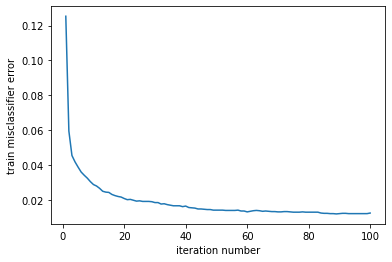

In [290]:
#####  plot train error VS iteration number
lamda = 0.053
tr_err = TISP_300(X_train,train_label,lamda,iteration)
plt.plot(np.arange(iteration)+1,tr_err)
plt.xlabel('iteration number')
plt.ylabel('train misclassifier error')

In [291]:
count = []
train_err = []
test_err = []
lamd = []
for lamda in [0.19,0.133,0.0875,0.053,0.0385]:
    weights = TISP(X_train,train_label,lamda,iteration)
    count_ = np.count_nonzero(weights)
    train_err_ = predict(X_train,train_label,weights)
    train_err.append(train_err_)
    test_err_ = predict(X_test,test_label,weights)
    test_err.append(test_err_)
    lamd.append(lamda)
    count.append(count_)

In [292]:
display(lamd,count,train_err,test_err)

[0.19, 0.133, 0.0875, 0.053, 0.0385]

[10, 30, 101, 299, 503]

[0.1213333333333333,
 0.07133333333333336,
 0.03183333333333338,
 0.012499999999999956,
 0.007833333333333359]

[0.122,
 0.07899999999999996,
 0.03300000000000003,
 0.017000000000000015,
 0.013000000000000012]

In [293]:
#####    problem b     #####

In [294]:
# data import
# Xtr = parsFormTrans(r"D:\2020fall\5635 machine learning\5635 hw\hw4\dexter\dexter_train.data")
Xtr = pd.read_csv('dexter_train.csv',header = None)
ytr_label = np.loadtxt(R"D:\2020fall\5635 machine learning\5635 hw\hw4\dexter\dexter_train.labels")
# Xte = parsFormTrans(r"D:\2020fall\5635 machine learning\5635 hw\hw4\dexter\dexter_valid.data")
Xte = pd.read_csv('dexter_valid.csv',header = None)
yte_label = np.loadtxt(r"D:\2020fall\5635 machine learning\5635 hw\hw4\dexter\dexter_valid.labels")

In [295]:
# add a column to the data
Xtr = np.hstack((np.ones((np.shape(Xtr)[0],1),dtype=int),Xtr))
Xte = np.hstack((np.ones((np.shape(Xte)[0],1),dtype=int),Xte))

In [296]:
ytr_label = (ytr_label+1)/2
yte_label = (yte_label+1)/2

In [297]:
# normalizedata
Xtr = scaler(Xtr)
Xte = scaler(Xte)

In [298]:
print(Xtr.shape,ytr_label.shape,Xte.shape,yte_label.shape)

(300, 20001) (300,) (300, 20001) (300,)


Text(0, 0.5, 'train misclassifier error')

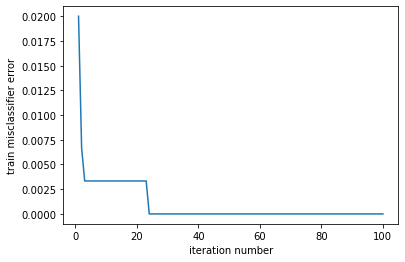

In [299]:
#####  plot train error VS iteration number
lamda = 0.0523
tr_err = TISP_300(Xtr,ytr_label,lamda,iteration)
plt.plot(np.arange(iteration)+1,tr_err)
plt.xlabel('iteration number')
plt.ylabel('train misclassifier error')

In [300]:
count = []
train_err = []
test_err = []
lamd = []
for lamda in [0.14,0.098,0.07,0.0523,0.0465]:
    weights = TISP(Xtr,ytr_label,lamda,iteration)
    count_ = np.count_nonzero(weights)
    train_err_ = predict(Xtr,ytr_label,weights)
    train_err.append(train_err_)
    test_err_ = predict(Xte,yte_label,weights)
    test_err.append(test_err_)
    lamd.append(lamda)
    count.append(count_)
display(lamd,count,train_err,test_err)

[0.14, 0.098, 0.07, 0.0523, 0.0465]

[11, 30, 103, 299, 507]

[0.12, 0.050000000000000044, 0.01666666666666672, 0.0, 0.0]

[0.17333333333333334,
 0.1166666666666667,
 0.08999999999999997,
 0.06333333333333335,
 0.07999999999999996]

In [301]:
#####    problem c     #####

In [302]:
# data import
train_data = np.loadtxt(r"D:\2020fall\5635 machine learning\5635 hw\hw4\madelon\madelon_train.data")
train_label = np.loadtxt(R"D:\2020fall\5635 machine learning\5635 hw\hw4\madelon\madelon_train.labels")
test_data = np.loadtxt(r"D:\2020fall\5635 machine learning\5635 hw\hw4\madelon\madelon_valid.data")
test_label = np.loadtxt(r"D:\2020fall\5635 machine learning\5635 hw\hw4\madelon\madelon_valid.labels")

In [303]:
# add a column to the data
train_data = np.hstack((np.ones((np.shape(train_data)[0],1),dtype=int),train_data))
test_data = np.hstack((np.ones((np.shape(test_data)[0],1),dtype=int),test_data))

In [304]:
train_label = (train_label+1)/2
test_label = (test_label +1)/2

In [305]:
# normalizedata
train_data = scaler(train_data)
test_data = scaler(test_data )

In [306]:
print(train_data.shape,train_label.shape,test_data.shape,test_label.shape)

(2000, 501) (2000,) (600, 501) (600,)


In [309]:
# lamda = 0.0001
# weights = TISP(train_data,train_label,lamda,iteration)
# count_ = np.count_nonzero(weights)
# print(count_)

Text(0, 0.5, 'train misclassifier error')

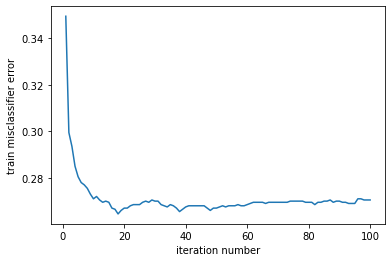

In [310]:
#####  plot train error VS iteration number
lamda = 0.0074
tr_err = TISP_300(train_data,train_label,lamda,iteration)
plt.plot(np.arange(iteration)+1,tr_err)
plt.xlabel('iteration number')
plt.ylabel('train misclassifier error')

In [311]:
count = []
train_err = []
test_err = []
lamd = []
for lamda in [0.0298,0.025,0.017,0.0074,0.0001]:
    weights = TISP(train_data,train_label,lamda,iteration)
    count_ = np.count_nonzero(weights)
    train_err_ = predict(train_data,train_label,weights)
    train_err.append(train_err_)
    test_err_ = predict(test_data,test_label,weights)
    test_err.append(test_err_)
    lamd.append(lamda)
    count.append(count_)
display(lamd,count,train_err,test_err)

[0.0298, 0.025, 0.017, 0.0074, 0.0001]

[8, 28, 101, 299, 497]

[0.386, 0.37050000000000005, 0.3255, 0.27049999999999996, 0.25849999999999995]

[0.4016666666666666,
 0.4116666666666666,
 0.43833333333333335,
 0.43333333333333335,
 0.42333333333333334]